In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import math

import seaborn as sns
sns.set_style("darkgrid")

import matplotlib.pyplot as plt
%matplotlib inline 

In [11]:
# playerID       Player ID code
# yearID         Year
# stint          player's stint (order of appearances within a season)
# teamID         Team
# lgID           League
# W              Wins
# L              Losses
# G              Games
# GS             Games Started
# CG             Complete Games 
# SHO            Shutouts
# SV             Saves
# IPOuts         Outs Pitched (innings pitched x 3)
# H              Hits
# ER             Earned Runs
# HR             Homeruns
# BB             Walks
# SO             Strikeouts
# BAOpp          Opponent's Batting Average
# ERA            Earned Run Average
# IBB            Intentional Walks
# WP             Wild Pitches
# HBP            Batters Hit By Pitch
# BK             Balks
# BFP            Batters faced by Pitcher
# GF             Games Finished
# R              Runs Allowed
# SH             Sacrifices by opposing batters
# SF             Sacrifice flies by opposing batters
# GIDP           Grounded into double plays by opposing batter

In [12]:
pitching = pd.read_csv("CSVs/pitching.csv")
pd.set_option("display.max_columns", 50)
pitching.tail(10)

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
46689,wrighst01,2018,1,BOS,AL,3,1,20,4,0,0,1,161,41,16,5,26,42,0.210,2.68,1.0,0,2.0,0,223.0,4,17,0.0,0.0,5.0
46690,yacabji01,2018,1,BAL,AL,0,2,12,7,0,0,0,120,40,24,8,18,33,0.261,5.40,1.0,4,5.0,0,177.0,0,25,1.0,0.0,3.0
46691,yarbrry01,2018,1,TBA,AL,16,6,38,6,0,0,0,442,140,64,18,50,128,0.246,3.91,6.0,1,8.0,0,628.0,3,70,1.0,1.0,10.0
46692,yateski01,2018,1,SDN,NL,5,3,65,0,0,0,12,189,41,15,6,17,90,0.181,2.14,0.0,2,4.0,0,250.0,28,15,0.0,3.0,2.0
46693,zagurmi01,2018,1,MIL,NL,0,1,2,0,0,0,0,3,5,7,0,2,2,0.625,63.00,1.0,0,0.0,0,10.0,0,7,0.0,0.0,0.0
46694,zamorda01,2018,1,NYN,NL,1,0,16,0,0,0,0,27,6,3,1,3,16,0.194,3.00,1.0,0,1.0,0,36.0,4,3,1.0,0.0,1.0
46695,zastrro01,2018,1,CHN,NL,1,0,6,0,0,0,0,17,6,3,0,4,3,0.286,4.76,0.0,0,1.0,0,26.0,2,3,0.0,0.0,0.0
46696,zieglbr01,2018,1,MIA,NL,1,5,53,0,0,0,10,156,49,23,7,17,37,0.254,3.98,4.0,1,2.0,0,213.0,23,25,0.0,1.0,11.0
46697,zieglbr01,2018,2,ARI,NL,1,1,29,0,0,0,0,65,22,9,1,8,13,0.265,3.74,2.0,0,0.0,0,92.0,1,9,0.0,1.0,3.0
46698,zimmejo02,2018,1,DET,AL,7,8,25,25,0,0,0,394,140,66,28,26,111,0.269,4.52,0.0,1,2.0,0,556.0,0,76,2.0,5.0,4.0


In [15]:
juiced = pitching[pitching['yearID'] > 2013]

In [13]:
ster = pitching[pitching['yearID'] > 1989]
steroids = ster[ster['yearID'] < 2004]

In [97]:
def distplot(df, colname):
    fig = plt.figure(figsize=(9,5))
    ax = fig.gca()
    ax.axvline(df[colname].mean(), color='red', linestyle='--', lw=2,label='Mean')
    sns.distplot(df[colname])
    ax.legend()
    plt.show()

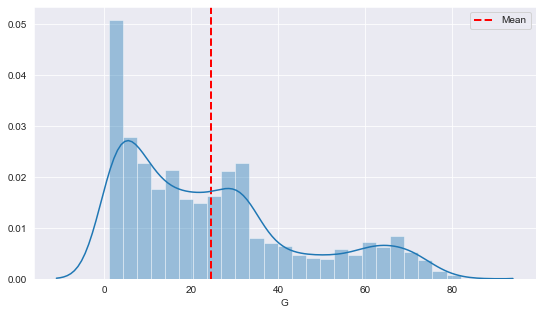

In [98]:
distplot(juiced, 'G') #games pitched juiced era

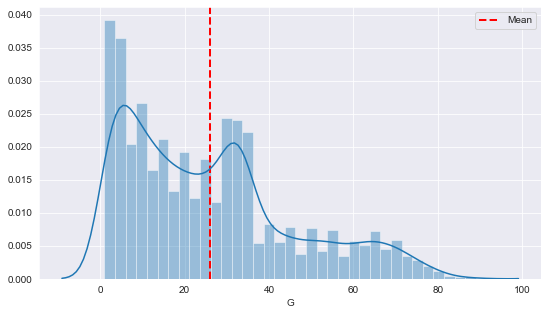

In [84]:
distplot(steroids, 'G') #games pitched steroid era

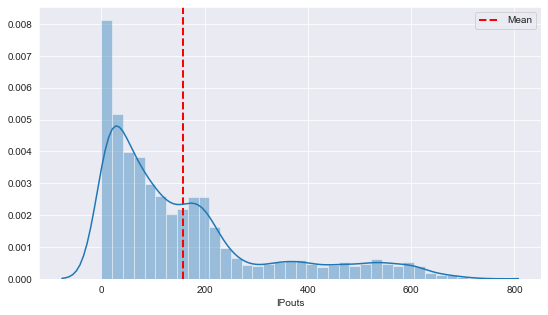

In [85]:
distplot(juiced, 'IPouts') #juiced outs pitched

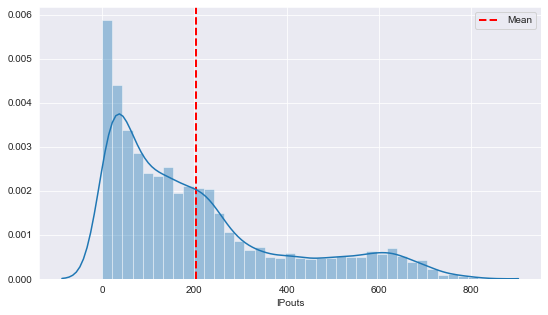

In [86]:
distplot(steroids, 'IPouts') #outs pitchs 

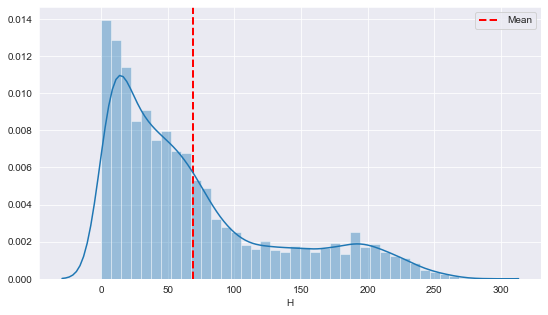

In [108]:
distplot(steroids, 'H')

In [88]:
#innings pitched 
juiced['IP'] = round((juiced['IPouts']/3),2)
steroids['IP'] = round((steroids['IPouts']/3),2)

/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [101]:
juiced.groupby('yearID').sum()

,stint,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,IP
yearID,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014,804,2430,2430,19321,4860,118,65,1264,130841,41595,18129,4186,14020,37441,196.909,3796.58,985.0,1696,1652.0,128,183929.0,4742,19761,1343.0,1277.0,3609.0,43613.57
2015,884,2429,2429,19964,4858,104,51,1292,130223,42106,19108,4909,14073,37446,212.851,3943.16,951.0,1758,1602.0,141,183628.0,4754,20647,1200.0,1232.0,3739.0,43407.64
2016,907,2427,2427,20159,4856,83,36,1276,129919,42276,20160,5610,15088,38982,220.818,4321.88,932.0,1808,1651.0,148,184580.0,4773,21744,1025.0,1214.0,3719.0,43306.43
2017,928,2430,2430,20517,4860,59,27,1179,129771,42215,20947,6105,15829,40104,226.348,4739.06,970.0,1810,1763.0,155,185295.0,4801,22582,925.0,1168.0,3804.0,43256.94
2018,999,2431,2431,21197,4862,42,19,1244,130467,41020,20052,5585,15686,41207,237.599,5233.96,929.0,1847,1922.0,151,185139.0,4820,21630,823.0,1235.0,3457.0,43488.93


In [103]:
steroids.groupby('yearID').sum()

,stint,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,IP
yearID,,,,,,,,,,,,,,,,,,,,,,,,,,,
1990,558,2105,2105,12694,4210,429,140,1113,112691,36817,16116,3317,13852,23853,141.286,2584.91,1384.0,1355,861.0,288,160316.0,3781,17919,1559.0,1261.0,3076.0,37563.61
1991,525,2104,2104,13171,4208,366,107,1132,113309,36558,16414,3383,13984,24390,135.308,2458.11,1228.0,1391,905.0,241,160746.0,3842,18127,1624.0,1249.0,3021.0,37769.64
1992,507,2106,2106,13251,4212,419,146,1109,113489,36544,15744,3038,13682,23538,126.727,2133.00,1315.0,1296,980.0,219,160545.0,3793,17341,1665.0,1294.0,3110.0,37829.71
1993,603,2268,2268,14839,4538,371,99,1192,121521,41088,18861,4030,15110,26310,152.096,2780.30,1477.0,1473,1200.0,298,174564.0,4167,20864,1811.0,1430.0,3430.0,40507.07
1994,515,1599,1599,10643,3200,255,69,777,85759,29743,14330,3306,11131,19766,139.366,2787.80,1008.0,1162,876.0,174,124483.0,2945,15752,1207.0,992.0,2443.0,28586.23
1995,689,2016,2016,13915,4034,275,88,1006,108096,36975,17822,4081,14240,25425,174.587,3498.84,1105.0,1414,1219.0,199,156703.0,3759,19554,1488.0,1173.0,3146.0,36032.02
1996,648,2266,2266,15594,4534,290,84,1116,121682,42320,20780,4962,16093,29308,167.440,3390.82,1343.0,1553,1404.0,197,177261.0,4244,22831,1544.0,1400.0,3609.0,40560.63
1997,656,2266,2266,15857,4532,266,89,1139,121362,41471,19729,4640,15666,29937,165.753,3203.96,1169.0,1482,1449.0,188,175541.0,4266,21604,1577.0,1383.0,3440.0,40454.00
1998,696,2430,2430,16826,4864,302,101,1265,130304,44489,21387,5064,16447,31893,174.982,3650.92,1067.0,1603,1587.0,205,188280.0,4562,23297,1705.0,1402.0,3704.0,43434.68
